In [24]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from pylab import *
from rdkit.Chem import Descriptors as CDesc

from rdkit.ML.Descriptors import MoleculeDescriptors

In [2]:
dataset = PandasTools.LoadSDF('../data/ADME/solubility.sdf')

RDKit WARNING: [19:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [19:14:59] Explicit valence for atom # 12 N, 5, is greater than permitted
RDKit ERROR: [19:14:59] ERROR: Could not sanitize molecule ending on line 161214
RDKit WARNING: [19:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:14:59] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [19:14:59] ERROR: Explicit valence for atom # 12 N, 5, is greater than permitted
RDKit ERROR: [19:15:00] Explicit valence for atom # 22 S, 8, is greater than permitted
RDKit ERROR: [19:15:00] ERROR: Could not sanitize molecule ending on line 245082
RDKit ERROR: [19:15:00] ERROR: Explicit valence for atom # 22 S, 8, is greater than permit

,ID,Name,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,MolLogP,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,ROMol
0,Row0,"N,N,N-trimethyloctadecan-1-aminium bromide",SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,11.3838728795,0.0,1,G1,392.5100000000002,3.9581000000000017,...,142.0,0.0,0.0,0.0,0.0,0.0,158.52060058500794,0.0,210.377334085253,
1,Row1,Benzo[cd]indol-2(1H)-one,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,11.7452329017,0.0,1,G1,169.18299999999996,2.405500000000001,...,62.0,2.0,0.0,1.0,3.0,29.1,75.18356289575135,2.5829963936570306,511.2292477154965,
2,Row2,4-chlorobenzaldehyde,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,12.8229220556,0.0,1,G1,140.569,2.1525,...,46.0,1.0,0.0,0.0,1.0,17.07,58.261133560819005,3.0097819477866006,202.66106510209755,
3,Row3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,11.0755909046,0.0,1,G1,756.2260000000002,8.11610000000001,...,264.0,6.0,0.0,0.0,6.0,120.72,323.7554336987488,2.322962880266304E-7,1964.648665828827,
4,Row4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,10.337935416899999,0.0,1,G1,422.5250000000002,2.4854000000000003,...,164.0,2.0,4.0,4.0,6.0,56.6,183.18326845703425,1.0844273169718197,769.8999341256456,

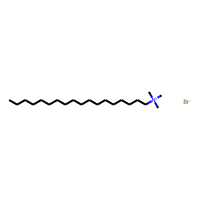
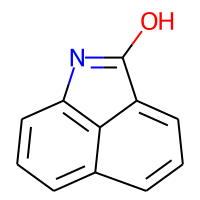
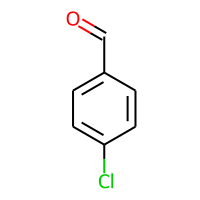
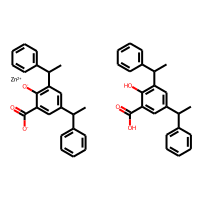
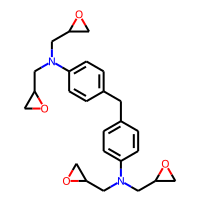

In [4]:
dataset.head()

In [6]:
dataset.shape

(9977, 26)

In [17]:
dataset['Solubility'] = dataset.Solubility.astype('float')

In [18]:
dataset.Solubility.dtype

dtype('float64')

(array([   4.,   11.,  124.,  538.,  738., 1478., 2382., 2611., 1558.,
         533.]),
 array([ 1.8281    ,  3.35905816,  4.89001632,  6.42097449,  7.95193265,
         9.48289081, 11.01384897, 12.54480713, 14.0757653 , 15.60672346,
        17.13768162]),
 <BarContainer object of 10 artists>)

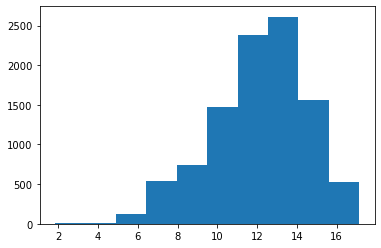

In [19]:
hist(dataset.Solubility)

In [20]:
mols = dataset.ROMol.values

In [26]:
desc_list = list(map( lambda a: a[0], CDesc.descList))
desc_list.remove('Ipc') # gives inf sometimes
desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator( desc_list )


In [29]:
lst = list(map( lambda a: desc_calc.CalcDescriptors(a), mols))

RDKit WARNING: [19:31:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:31:16] WARNING: not removing hydrogen atom without neighbors
[19:31:16] WARNING: not removing hydrogen atom without neighbors
[19:31:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:31:16] WARNING: not removing hydrogen atom without neighbors
[19:31:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:31:16] WARNING: not removing hydrogen atom without neighbors
[19:31:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:31:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:31:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:31:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:31:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:31:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:3